# Step Cadence Exercise
In this exercise, you are given an wrist-worn accelerometer signal of someone who is running. Using your knowledge of signal processing, what you learned about accelerometers, and the information below, estimate the distance that the wearer ran.

- The step rate is the largest frequency component in the accelerometer signal
- The wearer's average step length is 55 inches

## Imports

In [153]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as plticker
import scipy as sp
import scipy.signal
%matplotlib inline

## Load Data

In [2]:
with np.load('exercise1.npz') as npz:
    fs = npz['fs']    # The sampling rate 
    acc = npz['acc']  # The accelerometer signal

## Estimate Distance Ran
### Visualize the signal

In [7]:
time = np.array(range(0,len(acc)))/fs

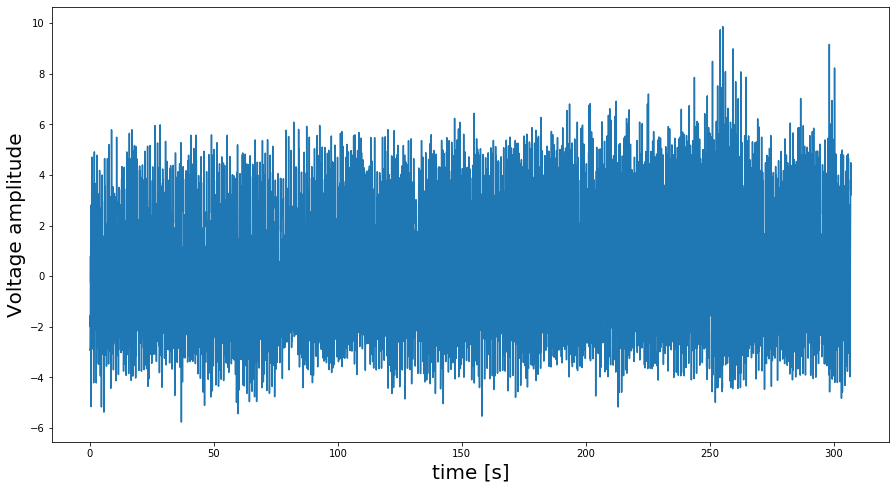

In [16]:
plt.figure(figsize=(15,8))
plt.plot(time,acc)
plt.ylabel("Voltage amplitude", fontsize=20)
plt.xlabel("time [s]", fontsize=20);

### Check frequency domain

In [295]:
# Getting frequencies vector
freqs = np.fft.rfftfreq(len(acc),1./fs)
# Gettign fourier coefficients
F_coeffs = np.fft.rfft(acc)/len(acc)

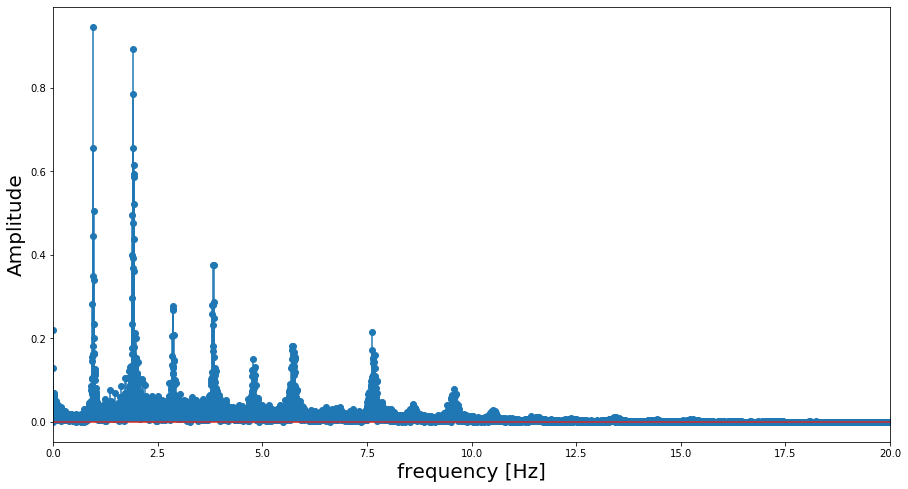

In [296]:
plt.figure(figsize=(15,8))
plt.stem(freqs,2*abs(F_coeffs), use_line_collection=True)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("frequency [Hz]", fontsize=20);
plt.xlim(0,20);

In [300]:
def get_topK_amp_freq(Fourier_coeffs, frequencies_vector, top_k=5):
    """
        This functions gets fourier coefficients and frequencies vector and returns
        the top_k Fourier coefficient amplitudes and their respective frequencies
    """
    # Order highest amplitude frequencies from higher to lower
    ind = np.argsort(abs(Fourier_coeffs))[::-1]
    sorted_Fcoeffs = Fourier_coeffs[ind]
    maxFreqs = []
    maxFcoeffs_amp = []
    for i, freq in enumerate(frequencies_vector[ind]):
        if len(maxFreqs) >= top_k:
            break
        if np.round(freq,0) not in np.round(maxFreqs,0):
            maxFreqs.append(freq)
            maxFcoeffs_amp.append(2*abs(sorted_Fcoeffs[i]))
    return maxFreqs, maxFcoeffs_amp

In [301]:
maxFreqs, maxFcoeffs_amp = get_topK_amp_freq(F_coeffs, freqs, top_k=10)
print(f"top frequencies are: {maxFreqs}")

top frequencies are: [0.9576547231270359, 1.9120521172638438, 3.8175895765472316, 2.8631921824104234, 0.003257328990228013, 7.622149837133551, 5.726384364820847, 4.768729641693811, 9.57328990228013, 8.599348534201955]


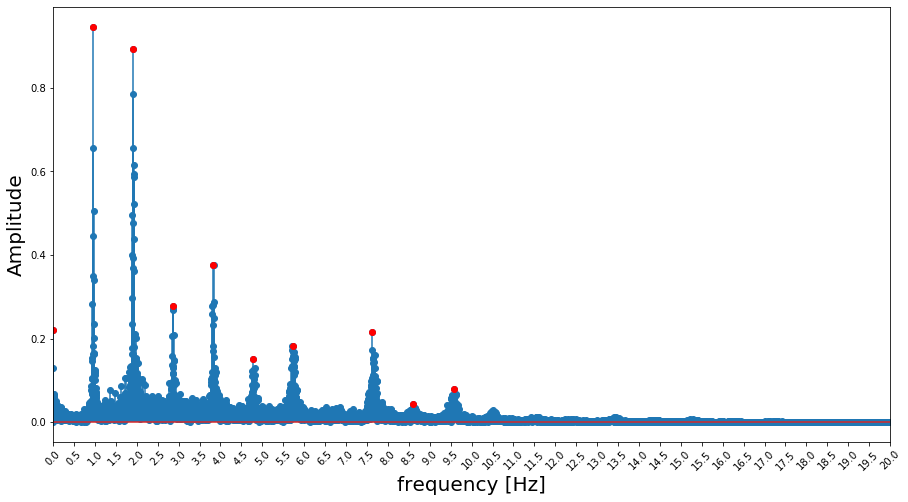

In [302]:
# Print max frequencies on the plot
plt.figure(figsize=(15,8))
ax = plt.subplot(111)
plt.stem(freqs,2*abs(F_coeffs),use_line_collection=True)
plt.plot(maxFreqs,maxFcoeffs_amp,'ro')
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("frequency [Hz]", fontsize=20);
plt.xlim(0,20);
loc = plticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=45);

### Bandpass filter

In [303]:
def BandpassFilter(signal, pass_band, fs):
    """Bandpass Filter.
    
    Args:
        signal: (np.array) The input signal
        pass_band: (tuple) The pass band. Frequency components outside 
            the two elements in the tuple will be removed.
        fs: (number) The sampling rate of <signal>
        
    Returns:
        (np.array) The filtered signal
    """
    b, a = sp.signal.butter(3, pass_band, btype='bandpass', fs=fs)
    return sp.signal.filtfilt(b, a, signal)

In [304]:
filtered_acc = BandpassFilter(acc, (0.5,3), fs)

(0, 10)

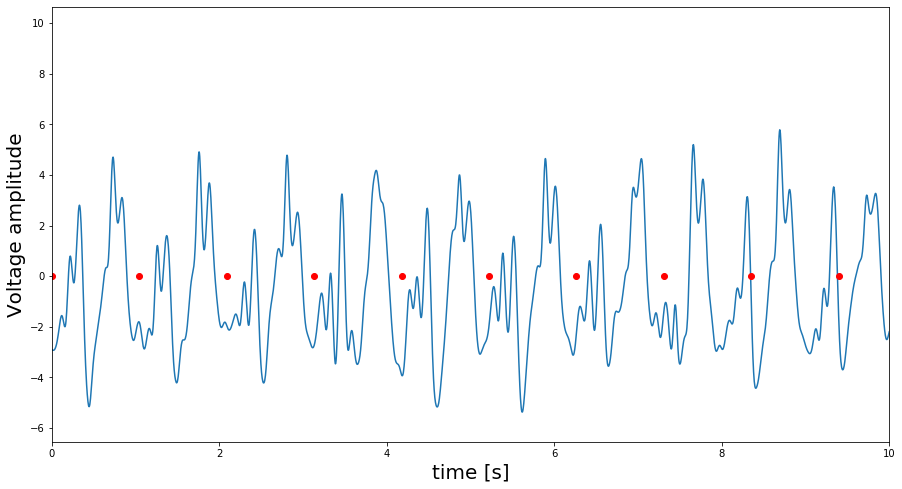

In [305]:
plt.figure(figsize=(15,8))
plt.plot(time,acc)
plt.ylabel("Voltage amplitude", fontsize=20)
plt.xlabel("time [s]", fontsize=20);
plt.plot(time_2,np.zeros(len(time_2)),'ro')
plt.xlim(0,10)

(0, 10)

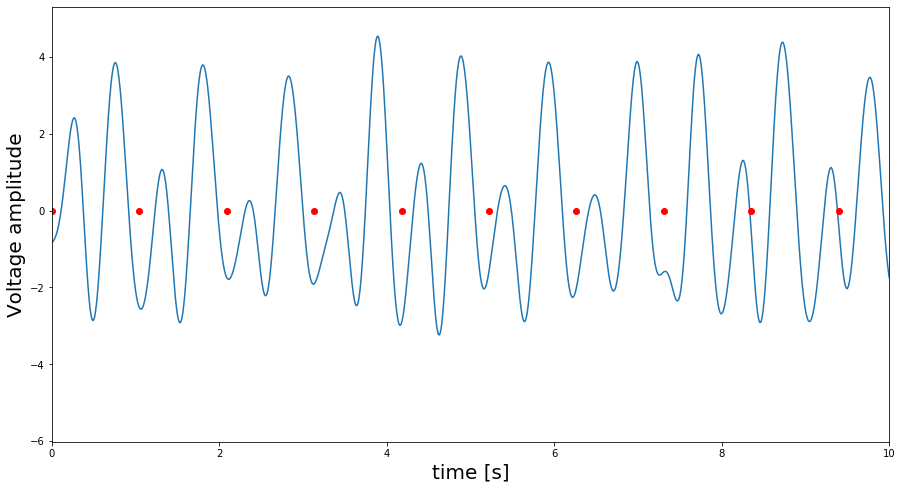

In [306]:
plt.figure(figsize=(15,8))
plt.plot(time,filtered_acc)
plt.ylabel("Voltage amplitude", fontsize=20)
plt.xlabel("time [s]", fontsize=20);
plt.plot(time_2,np.zeros(len(time_2)),'ro')
plt.xlim(0,10)

In [187]:
time_2 = np.array(range(0,10))/0.9576547231270359

### Plot the spectrogram

Text(0, 0.5, 'Amplitude')

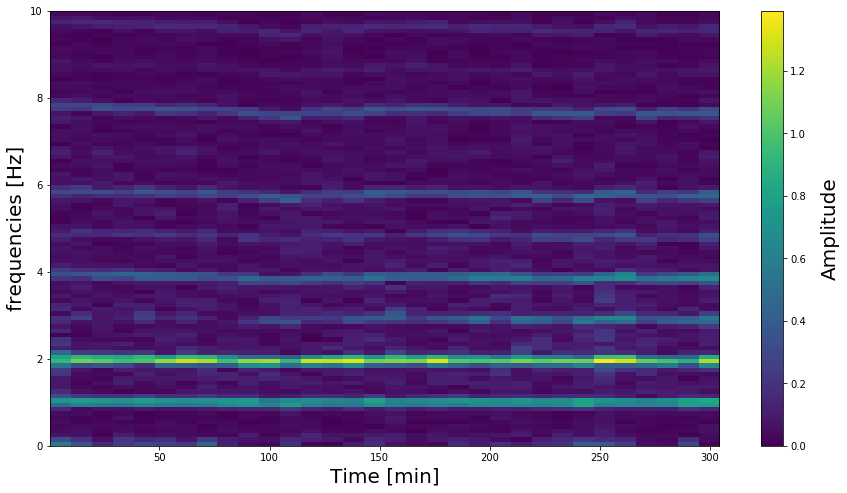

In [356]:
plt.figure(figsize=(15,8))
NFFT=fs*10
spec,  freq, t, cax = plt.specgram(acc, NFFT=NFFT, scale='linear',Fs=fs, mode='magnitude');
plt.xlabel('Time [min]', fontsize=20);
plt.ylabel('frequencies [Hz]', fontsize=20);
plt.ylim(0,10)
cbar = plt.colorbar();
cbar.ax.set_ylabel('Amplitude', rotation=90, labelpad=15, fontsize=20)

In [350]:
spec.shape

(1281, 32)

In [351]:
len(freq)

1281

In [352]:
freq[np.argmax(spec, axis=0)]

array([1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9,
       1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9,
       1.9, 1.9, 1.9, 1.9, 1.9, 1.9])

In [353]:
spec[np.argmax(spec, axis=0)]

array([[0.92714714, 1.08181015, 1.03846494, ..., 0.97988769, 0.87855814,
        1.22040445],
       [0.92714714, 1.08181015, 1.03846494, ..., 0.97988769, 0.87855814,
        1.22040445],
       [0.92714714, 1.08181015, 1.03846494, ..., 0.97988769, 0.87855814,
        1.22040445],
       ...,
       [0.92714714, 1.08181015, 1.03846494, ..., 0.97988769, 0.87855814,
        1.22040445],
       [0.92714714, 1.08181015, 1.03846494, ..., 0.97988769, 0.87855814,
        1.22040445],
       [0.92714714, 1.08181015, 1.03846494, ..., 0.97988769, 0.87855814,
        1.22040445]])

In [344]:
np.argmax(spec, axis=0)

array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19],
      dtype=int64)

In [345]:
spec[19,:]

array([0.92714714, 1.08181015, 1.03846494, 0.95948018, 0.98948061,
       1.17773105, 1.27754595, 1.21640434, 0.9668563 , 1.1597621 ,
       1.18881489, 0.91569432, 1.28454714, 1.26636412, 1.33596963,
       1.09696282, 1.12989269, 1.11609766, 1.32145332, 1.0261034 ,
       0.99119278, 1.02489365, 1.10661247, 1.04109393, 1.08807014,
       1.07635983, 1.39131627, 1.29568673, 1.06254791, 0.97988769,
       0.87855814, 1.22040445])

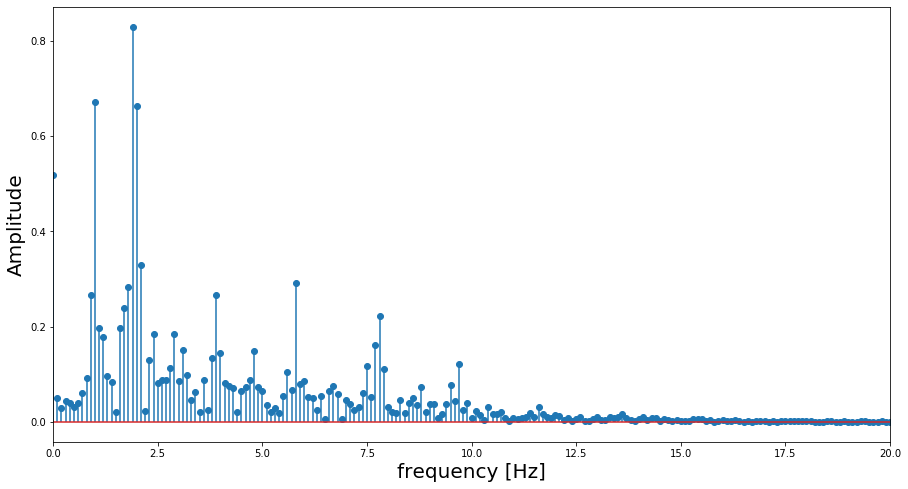

In [359]:
# Getting frequencies vector
freqs = np.fft.rfftfreq(len(acc[:NFFT]),1./fs)
# Gettign fourier coefficients
F_coeffs = np.fft.rfft(acc[:NFFT])/len(acc[:NFFT])
plt.figure(figsize=(15,8))
plt.stem(freqs,abs(F_coeffs), use_line_collection=True)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("frequency [Hz]", fontsize=20);
plt.xlim(0,20);

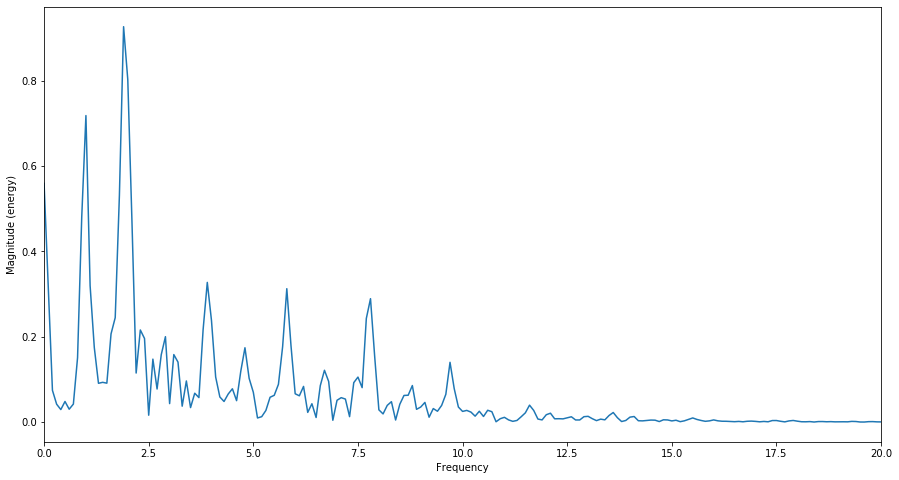

In [360]:
plt.figure(figsize=(15,8))
plt.magnitude_spectrum(acc[:NFFT],Fs=fs)
plt.xlim(0,20);